In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_keys import geoapify_key
import seaborn as sns

hate_crime_df = pd.read_csv('../Resources/hate_crime.csv', low_memory=False)
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [2]:
hate_crime_df['REGION_NAME'].unique()

array(['South', 'West', 'Northeast', 'Midwest', 'U.S. Territories',
       'Other'], dtype=object)

In [3]:
hate_crime_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [4]:
clean_crime = hate_crime_df.drop(columns= ["INCIDENT_ID", "PUB_AGENCY_NAME", "JUVENILE_VICTIM_COUNT","ADULT_VICTIM_COUNT", "ADULT_OFFENDER_COUNT", "JUVENILE_OFFENDER_COUNT", "POPULATION_GROUP_CODE"])

In [5]:
clean_crime.head()

,DATA_YEAR,ORI,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_DESC,INCIDENT_DATE,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,1991,AR0040200,NaN,City,AR,Arkansas,West South Central,South,"Cities from 10,000 thru 24,999",31-AUG-91,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,1991,AR0290100,NaN,City,AR,Arkansas,West South Central,South,"Cities from 2,500 thru 9,999",19-SEP-91,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,1991,AR0350100,NaN,City,AR,Arkansas,West South Central,South,"Cities from 50,000 thru 99,999",04-JUL-91,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,1991,AR0350100,NaN,City,AR,Arkansas,West South Central,South,"Cities from 50,000 thru 99,999",24-DEC-91,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,1991,AR0350100,NaN,City,AR,Arkansas,West South Central,South,"Cities from 50,000 thru 99,999",23-DEC-91,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [8]:
summary_crime =clean_crime.copy()
summary_crime_count=summary_crime[['STATE_NAME']]
summary_crime_count

,STATE_NAME
0,Arkansas
1,Arkansas
2,Arkansas
3,Arkansas
4,Arkansas
...,...
201398,West Virginia
201399,West Virginia
201400,West Virginia
201401,West Virginia


In [9]:
summary_crime =clean_crime.copy()
summary_crime_count=summary_crime[['DATA_YEAR', 'REGION_NAME','OFFENDER_RACE','VICTIM_COUNT','TOTAL_INDIVIDUAL_VICTIMS']]
summary_crime_count.head()

,DATA_YEAR,REGION_NAME,OFFENDER_RACE,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
0,1991,South,White,1,1.0
1,1991,South,Black or African American,1,1.0
2,1991,South,Black or African American,1,1.0
3,1991,South,Black or African American,2,1.0
4,1991,South,Black or African American,1,1.0


In [11]:
summary_crime_race=summary_crime_count.groupby(["DATA_YEAR"]).sum()  
summary_crime_race.head()

,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
DATA_YEAR,,
1991,5793,4711.0
1992,8461,6959.0
1993,9400,7833.0
1994,7528,6188.0
1995,10471,8420.0


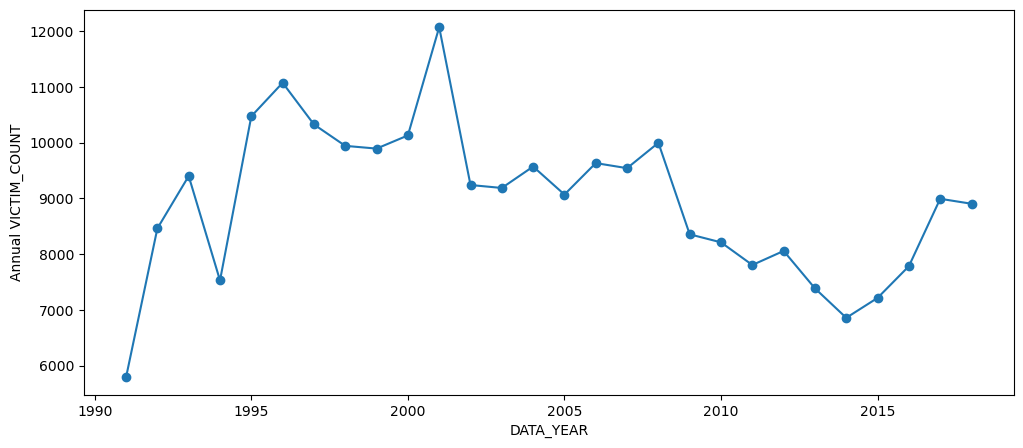

In [16]:
ax = summary_crime_race['VICTIM_COUNT'].plot(marker='o', linestyle='-', figsize=(12,5))
ax.set_ylabel('Annual VICTIM_COUNT');

In [18]:
#sns.set(rc={'figure.figsize':(11, 4)})
#summary_crime_race['VICTIM_COUNT'].plot(linewidth=0.5);
#ax.set_ylabel('Annual VICTIM_COUNT')


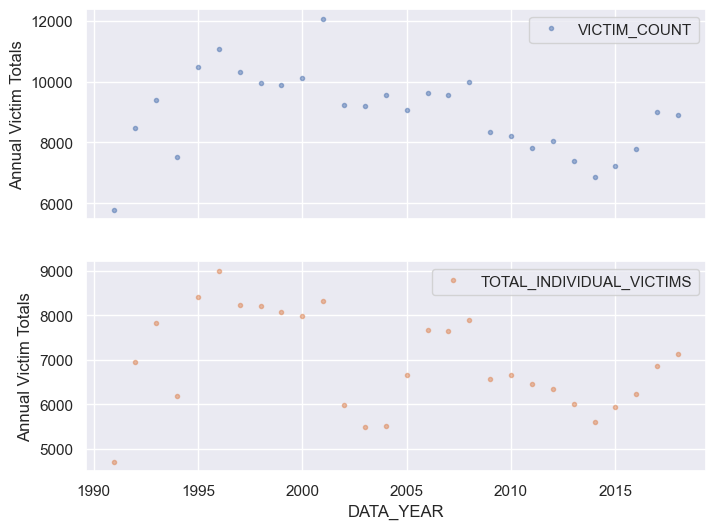

In [19]:
cols_plot = ['VICTIM_COUNT', 'TOTAL_INDIVIDUAL_VICTIMS']
axes =  summary_crime_race[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(8, 6), subplots=True)
for ax in axes:
    ax.set_ylabel('Annual Victim Totals')